In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load & prep
df = pd.read_csv("test_results.csv", dtype=str, na_filter=False)
df["score"] = pd.to_numeric(df["score"], errors="coerce")

# 3) Filter to only evaluated rows with score > 0
df = df[df["score"] > 0]

# 4) Convert response_length too (if needed)
df["response_length"] = pd.to_numeric(df["response_length"], errors="coerce")

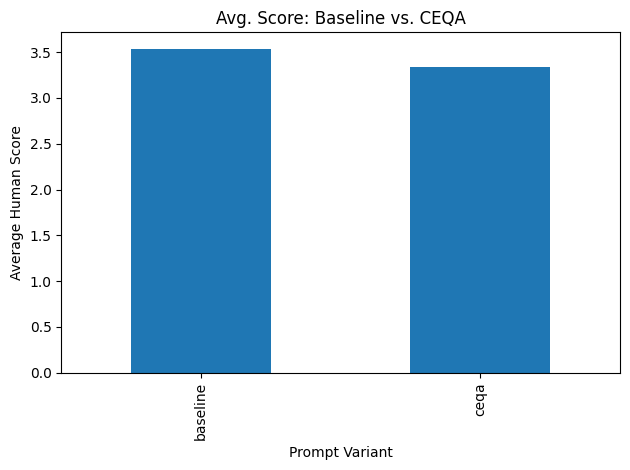

In [13]:
avg_score = df.groupby("prompt_variant")["score"].mean().reindex(["baseline","ceqa"])

fig, ax = plt.subplots()
avg_score.plot(kind="bar", ax=ax)
ax.set_xlabel("Prompt Variant")
ax.set_ylabel("Average Human Score")
ax.set_title("Avg. Score: Baseline vs. CEQA")
plt.tight_layout()
plt.show()

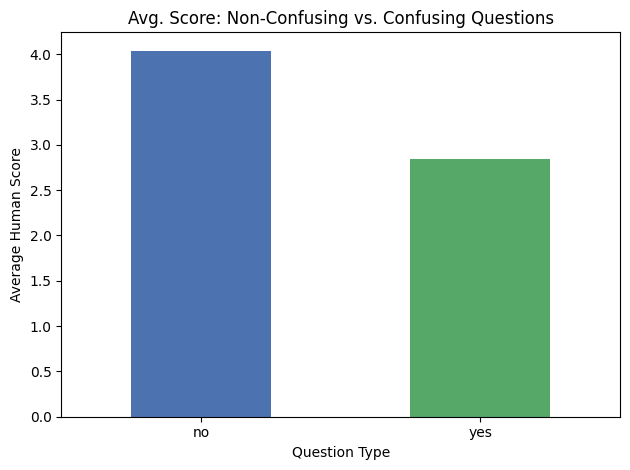

In [14]:
avg_conf = df.groupby("confusing")["score"].mean().reindex(["no","yes"])

fig, ax = plt.subplots()
avg_conf.plot(kind="bar", ax=ax, color=["#4C72B0", "#55A868"])
ax.set_xlabel("Question Type")
ax.set_ylabel("Average Human Score")
ax.set_title("Avg. Score: Non-Confusing vs. Confusing Questions")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


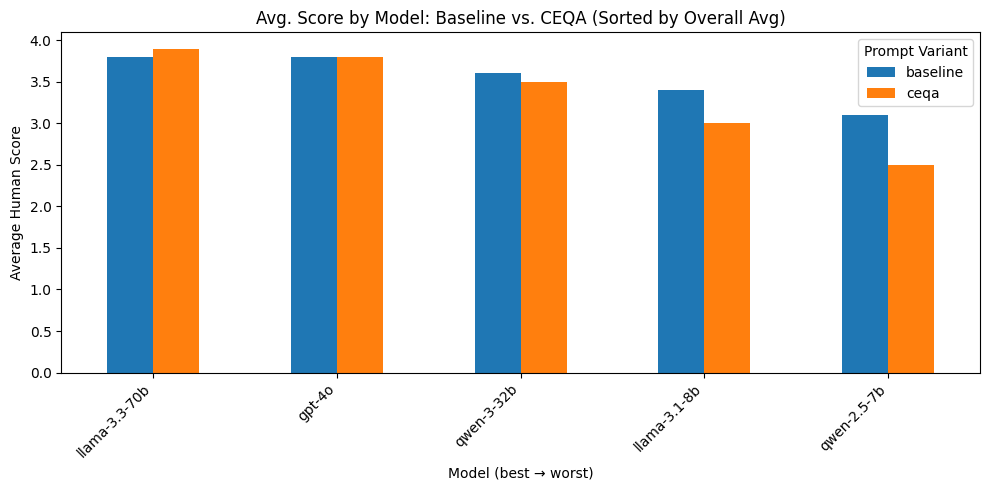

In [19]:
model_avg = df.groupby("model")["score"].mean()
model_order = model_avg.sort_values(ascending=False).index

# 2) Pivot for grouped bars, then reindex by that order
pivot = (
    df
    .groupby(["model", "prompt_variant"])["score"]
    .mean()
    .unstack()
    .reindex(index=model_order, columns=["baseline","ceqa"])
)

# 3) Plot
fig, ax = plt.subplots(figsize=(10, 5))
pivot.plot(kind="bar", ax=ax)
ax.set_xlabel("Model (best → worst)")
ax.set_ylabel("Average Human Score")
ax.set_title("Avg. Score by Model: Baseline vs. CEQA (Sorted by Overall Avg)")
ax.legend(title="Prompt Variant")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


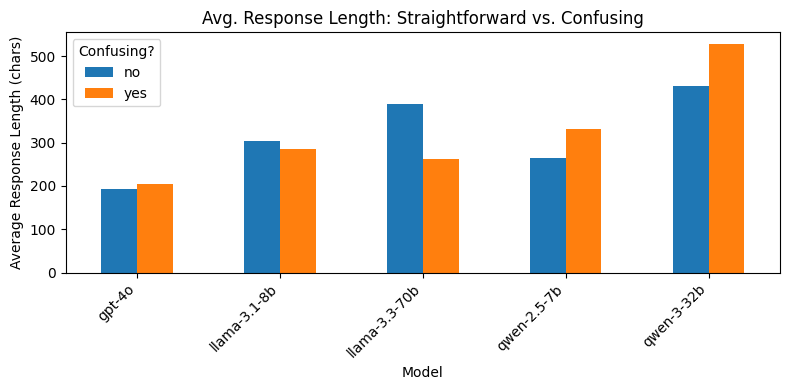

In [16]:
# pivot: rows=models, cols=confusing flag
pivot = (
    df
    .groupby(["model","confusing"])["response_length"]
    .mean()
    .unstack()
    .reindex(columns=["no","yes"])
)

fig, ax = plt.subplots(figsize=(8,4))
pivot.plot(kind="bar", ax=ax)
ax.set_xlabel("Model")
ax.set_ylabel("Average Response Length (chars)")
ax.set_title("Avg. Response Length: Straightforward vs. Confusing")
plt.xticks(rotation=45, ha="right")
ax.legend(title="Confusing?")
plt.tight_layout()
plt.show()
